In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('E:\\laptop_price.csv')

In [3]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [5]:
df.shape

(1275, 15)

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [8]:
df.rename(columns={'CPU_Frequency (GHz)':'CPU_Frequency', 'RAM (GB)':'RAM', 'Weight (kg)':'Weight','Price (Euro)':'Price' }, inplace=True)

In [9]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
CPU_Company          object
CPU_Type             object
CPU_Frequency       float64
RAM                   int64
Memory               object
GPU_Company          object
GPU_Type             object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [10]:
df['RAM'] = df['RAM'].astype('int32')
df['Weighth'] = df['Weighth'].astype('float32')

KeyError: 'Weighth'

In [ ]:
df.dtypes

## EDA

In [ ]:
sns.distplot(df['Price'])
plt.show()

In [ ]:

# df['Company'].value_counts()
df['Company'].value_counts().plot(kind='bar')





## Conclude that Dell is the most Selling Laptop

In [ ]:
df['TypeName'].value_counts()

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Conclude that Work Station is expensive

In [11]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94


In [12]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [13]:
df['Touch_Screen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [14]:
df['Touch_Screen'].value_counts()

Touch_Screen
0    1087
1     188
Name: count, dtype: int64

<Axes: xlabel='Touch_Screen'>

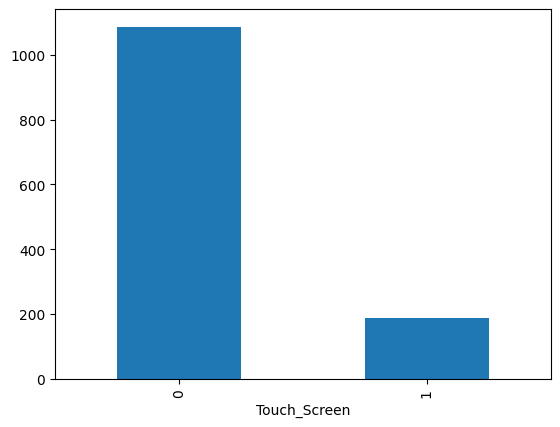

In [15]:
df['Touch_Screen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touch_Screen', ylabel='Price'>

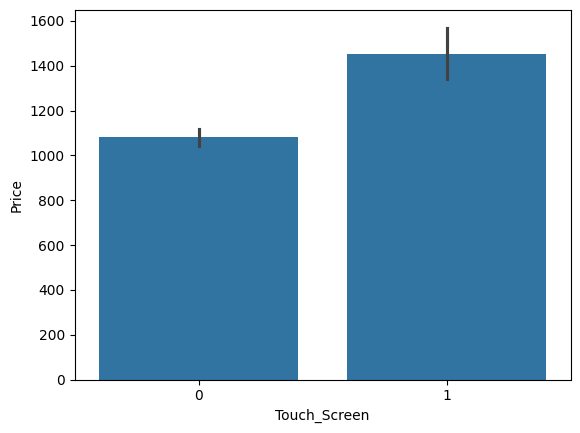

In [16]:
sns.barplot(x=df['Touch_Screen'], y=df['Price'])

## Touch Screen Laptop is expensive

In [17]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [18]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS
798,Lenovo,Yoga 910-13IKB,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 7500U,2.7,8,256GB SSD,Intel,HD Graphics 620,Windows 10,1.38,1349.0,1,1
327,Asus,VivoBook S15,Ultrabook,15.6,Full HD 1920x1080,Intel,Core i7 7500U,2.7,8,256GB SSD,Nvidia,GeForce 940MX,Windows 10,1.70,1049.9,0,0
682,Dell,Alienware 15,Gaming,15.6,Full HD 1920x1080,Intel,Core i5 7300HQ,2.5,16,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 1060,Windows 10,3.21,2051.0,0,0
185,Dell,Inspiron 7773,Notebook,17.3,Full HD / Touchscreen 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce 150MX,Windows 10,2.77,1549.0,1,0
648,Toshiba,Portege Z30-C-16J,Notebook,13.3,Full HD 1920x1080,Intel,Core i5 6200U,2.3,8,256GB SSD,Intel,HD Graphics 520,Windows 10,1.20,1213.0,0,0


In [19]:
df['IPS'].value_counts()

IPS
0    918
1    357
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

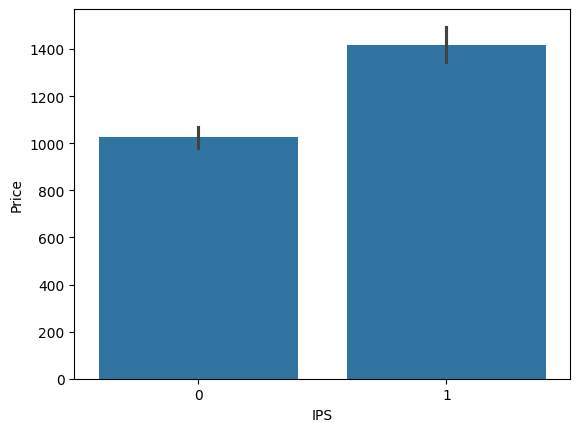

In [20]:
sns.barplot(x=df['IPS'], y=df['Price'])

In [21]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)


In [22]:
df['X_res']=new[0]
df['y_res']=new[1]

In [23]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,X_res,y_res
1128,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel,Core i5 7300HQ,2.5,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 1060,No OS,2.40,989.00,0,1,IPS Panel Full HD 1920,1080
475,Dell,Latitude E5470,Notebook,14.0,1366x768,Intel,Core i3 6100U,2.3,8,128GB SSD,Intel,HD Graphics 520,Windows 10,1.79,740.00,0,0,1366,768
381,Lenovo,V310-15ISK (i3-6006U/4GB/128GB/FHD/No,Notebook,15.6,Full HD 1920x1080,Intel,Core i3 6006U,2.0,4,128GB SSD,Intel,HD Graphics 520,No OS,1.85,403.50,0,0,Full HD 1920,1080
130,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,8,1TB HDD,AMD,Radeon R7 M445,Windows 10,2.36,638.99,0,0,1366,768
1087,Lenovo,ThinkPad T460,Notebook,14.0,Full HD 1920x1080,Intel,Core i5 6200U,2.3,8,180GB SSD,Intel,HD Graphics 520,Windows 7,1.70,1199.00,0,0,Full HD 1920,1080


In [24]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [25]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,X_res,y_res
1258,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel,Core i7 6500U,2.5,8,1.0TB Hybrid,AMD,Radeon R5 M330,Windows 7,2.32,895.00,0,0,1920,1080
679,Acer,Aspire VX5-591G,Gaming,15.6,Full HD 1920x1080,Intel,Core i5 7300HQ,2.5,16,256GB SSD,Nvidia,GeForce GTX 1050 Ti,Windows 10,2.50,1299.00,0,0,1920,1080
581,Dell,Latitude 5580,Notebook,15.6,1366x768,Intel,Core i5 7300U,2.6,8,500GB HDD,Intel,HD Graphics 620,Windows 10,1.90,1008.52,0,0,1366,768
1031,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,6,1TB HDD,AMD,Radeon R5,Windows 10,2.10,409.00,0,0,1366,768
1098,HP,250 G5,Notebook,15.6,1366x768,Intel,Pentium Quad Core N3710,1.6,4,1TB HDD,Intel,HD Graphics 405,Windows 10,1.96,500.00,0,0,1366,768


In [26]:
df['X_res']=df['X_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU_Company       1275 non-null   object 
 6   CPU_Type          1275 non-null   object 
 7   CPU_Frequency     1275 non-null   float64
 8   RAM               1275 non-null   int32  
 9   Memory            1275 non-null   object 
 10  GPU_Company       1275 non-null   object 
 11  GPU_Type          1275 non-null   object 
 12  OpSys             1275 non-null   object 
 13  Weight            1275 non-null   float64
 14  Price             1275 non-null   float64
 15  Touch_Screen      1275 non-null   int64  
 16  IPS               1275 non-null   int64  


In [28]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
CPU_Company          object
CPU_Type             object
CPU_Frequency       float64
RAM                   int32
Memory               object
GPU_Company          object
GPU_Type             object
OpSys                object
Weight              float64
Price               float64
Touch_Screen          int64
IPS                   int64
X_res                 int32
y_res                 int32
dtype: object

In [29]:
df_numeric=df.select_dtypes(include=[float,int])
correl=df_numeric.corr()

In [30]:
correl

,Inches,CPU_Frequency,RAM,Weight,Price,Touch_Screen,IPS,X_res,y_res
Inches,1.000000,0.305037,0.241078,0.826638,0.066608,-0.361957,-0.110116,-0.068223,-0.093062
CPU_Frequency,0.305037,1.000000,0.366254,0.318649,0.428847,-0.091798,0.064358,0.178659,0.164369
RAM,0.241078,0.366254,1.000000,0.389370,0.740287,0.111622,0.201781,0.424089,0.415241
Weight,0.826638,0.318649,0.389370,1.000000,0.211883,-0.293984,0.022129,-0.028605,-0.050106
Price,0.066608,0.428847,0.740287,0.211883,1.000000,0.188886,0.250737,0.552491,0.548529
Touch_Screen,-0.361957,-0.091798,0.111622,-0.293984,0.188886,1.000000,0.139723,0.343249,0.350495
IPS,-0.110116,0.064358,0.201781,0.022129,0.250737,0.139723,1.000000,0.272000,0.280009
X_res,-0.068223,0.178659,0.424089,-0.028605,0.552491,0.343249,0.272000,1.000000,0.994069
y_res,-0.093062,0.164369,0.415241,-0.050106,0.548529,0.350495,0.280009,0.994069,1.000000


In [31]:
df['ppi'] = (((df['X_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')


In [32]:
correl

,Inches,CPU_Frequency,RAM,Weight,Price,Touch_Screen,IPS,X_res,y_res
Inches,1.000000,0.305037,0.241078,0.826638,0.066608,-0.361957,-0.110116,-0.068223,-0.093062
CPU_Frequency,0.305037,1.000000,0.366254,0.318649,0.428847,-0.091798,0.064358,0.178659,0.164369
RAM,0.241078,0.366254,1.000000,0.389370,0.740287,0.111622,0.201781,0.424089,0.415241
Weight,0.826638,0.318649,0.389370,1.000000,0.211883,-0.293984,0.022129,-0.028605,-0.050106
Price,0.066608,0.428847,0.740287,0.211883,1.000000,0.188886,0.250737,0.552491,0.548529
Touch_Screen,-0.361957,-0.091798,0.111622,-0.293984,0.188886,1.000000,0.139723,0.343249,0.350495
IPS,-0.110116,0.064358,0.201781,0.022129,0.250737,0.139723,1.000000,0.272000,0.280009
X_res,-0.068223,0.178659,0.424089,-0.028605,0.552491,0.343249,0.272000,1.000000,0.994069
y_res,-0.093062,0.164369,0.415241,-0.050106,0.548529,0.350495,0.280009,0.994069,1.000000


In [33]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [34]:
df.head()

,Company,Product,TypeName,Inches,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,X_res,y_res,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [35]:
df.drop(columns=['Inches','X_res', 'y_res'], inplace=True)

In [36]:
df.head(5)

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [37]:
df['Cpu_Name'] = (df['CPU_Company'] + ' ' + df['CPU_Type']).apply(lambda x: ' '.join(x.split()[0:3]))


In [38]:
df.head(5)

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [39]:
df['Cpu_Name'].unique

<bound method Series.unique of 0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1270         Intel Core i7
1271         Intel Core i7
1272    Intel Celeron Dual
1273         Intel Core i7
1274    Intel Celeron Dual
Name: Cpu_Name, Length: 1275, dtype: object>

In [40]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [41]:
df['Cpu_brand']=df['Cpu_Name'].apply(fetch_processor)

<Axes: xlabel='Cpu_brand'>

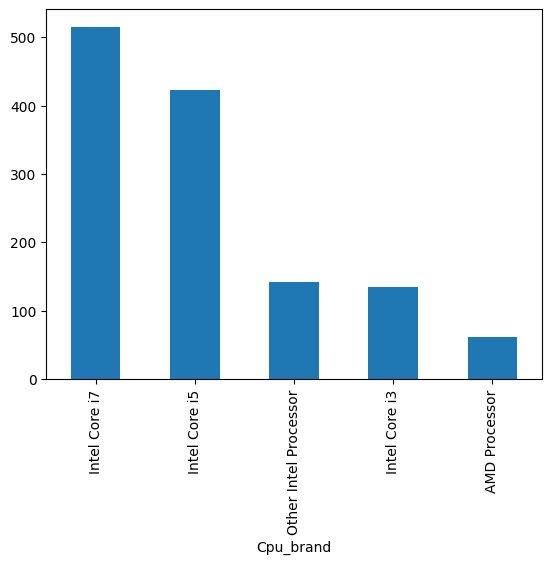

In [42]:
df['Cpu_brand'].value_counts().plot(kind='bar')

In [43]:
df.head()

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


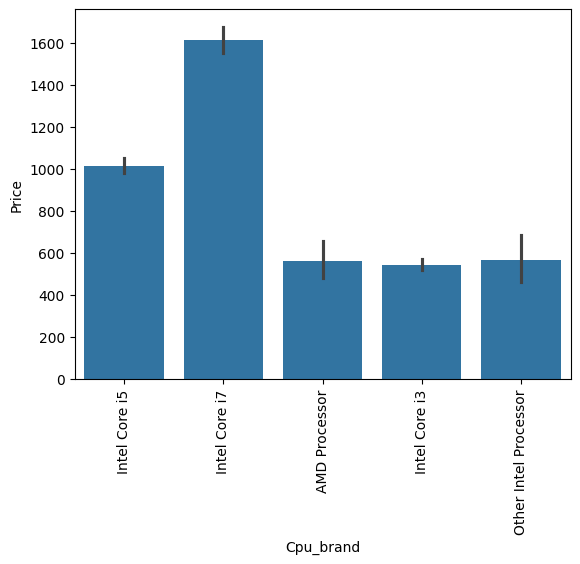

In [44]:
sns.barplot(x=df['Cpu_brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.columns

Index(['Company', 'Product', 'TypeName', 'CPU_Company', 'CPU_Type',
       'CPU_Frequency', 'RAM', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys',
       'Weight', 'Price', 'Touch_Screen', 'IPS', 'ppi', 'Cpu_Name',
       'Cpu_brand'],
      dtype='object')

In [46]:
df.head()

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='RAM'>

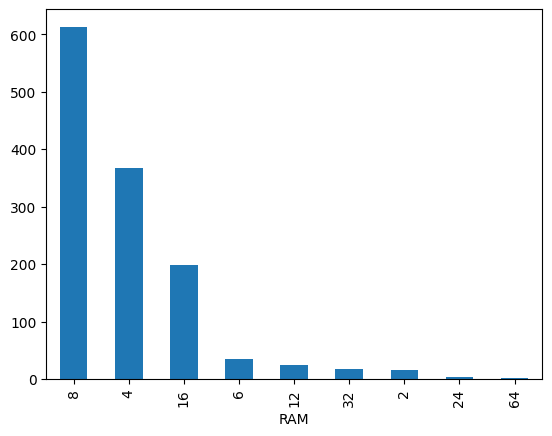

In [47]:
df['RAM'].value_counts().plot(kind='bar')

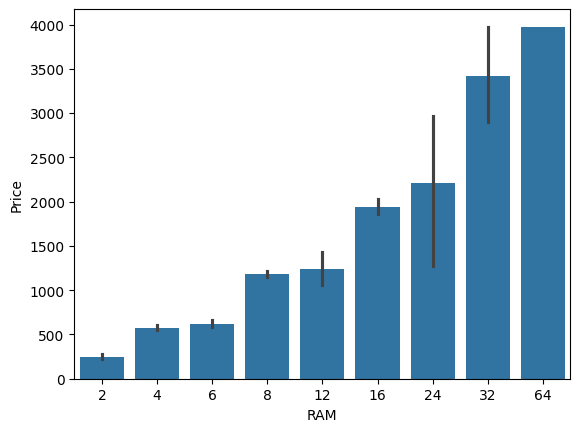

In [48]:
sns.barplot(x=df['RAM'],y=df['Price'])
plt.show()

In [49]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [50]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '').str.replace('TB', '000')

# Step 2: Split Memory Data
new = df["Memory"].str.split("+", n=1, expand=True)

# Step 3: Process First Layer
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()  # Fill NaN with '0'

# Step 4: Identify Storage Types
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 5: Clean Up First Layer for Numeric Conversion
df['first'] = df['first'].str.replace(r'\D', '', regex=True)  # Keep only digits
df['first'] = pd.to_numeric(df['first'], errors='coerce').fillna(0).astype('int32')  # Convert to int, replacing errors with 0

# Step 6: Process Second Layer
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 7: Clean Up Second Layer for Numeric Conversion
df['second'] = df['second'].str.replace(r'\D', '', regex=True)  # Keep only digits
df['second'] = pd.to_numeric(df['second'], errors='coerce').fillna(0).astype('int32')  # Convert to int

# Step 8: Calculate Total Storage Types
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Step 9: Drop Intermediate Columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_7860\811326079.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [51]:
df.sample(5)

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,...,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
441,Dell,Inspiron 5570,Notebook,Intel,Core i5 8250U,1.6,4,256 SSD,AMD,Radeon 530,...,749.0,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
341,Lenovo,IdeaPad 320-15ABR,Notebook,AMD,A12-Series 9720P,3.6,12,2000 HDD,AMD,Radeon 530,...,899.0,0,0,141.211998,AMD A12-Series 9720P,AMD Processor,2000,0,0,0
251,Asus,ROG G752VSK-GC493T,Gaming,Intel,Core i7 7700HQ,2.8,16,256 SSD + 1000 HDD,Nvidia,GeForce GTX 980M,...,1799.0,0,0,127.335675,Intel Core i7,Intel Core i7,1000,256,0,0
186,Dell,XPS 15,Notebook,Intel,Core i7 7700HQ,2.8,16,512 SSD,Nvidia,GeForce GTX 1050,...,2397.0,1,0,282.423996,Intel Core i7,Intel Core i7,0,512,0,0
310,Lenovo,IdeaPad 720S-13IKB,Notebook,Intel,Core i5 7200U,2.5,8,256 SSD,Intel,HD Graphics 620,...,999.0,0,1,165.632118,Intel Core i5,Intel Core i5,0,256,0,0


In [52]:
df.drop(columns=['Memory'], inplace=True)

In [53]:
df.head(4)

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,GPU_Company,GPU_Type,OpSys,...,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,Intel,Iris Plus Graphics 640,macOS,...,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,Intel,HD Graphics 6000,macOS,...,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,Intel,HD Graphics 620,No OS,...,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,2.7,16,AMD,Radeon Pro 455,macOS,...,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0


In [54]:
df_numeric=df.select_dtypes(include=[float,int])
correl=df_numeric.corr()

In [55]:
correl

,CPU_Frequency,RAM,Weight,Price,Touch_Screen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
CPU_Frequency,1.000000,0.366254,0.318649,0.428847,-0.091798,0.064358,0.038701,0.125441,0.265093,0.049013,-0.222956
RAM,0.366254,1.000000,0.389370,0.740287,0.111622,0.201781,0.293482,0.097689,0.600091,0.050365,-0.056421
Weight,0.318649,0.389370,1.000000,0.211883,-0.293984,0.022129,-0.320933,0.511241,-0.056043,0.105144,-0.177167
Price,0.428847,0.740287,0.211883,1.000000,0.188886,0.250737,0.470032,-0.098108,0.670237,0.022598,-0.037031
Touch_Screen,-0.091798,0.111622,-0.293984,0.188886,1.000000,0.139723,0.454303,-0.206133,0.249798,-0.036535,-0.017345
IPS,0.064358,0.201781,0.022129,0.250737,0.139723,1.000000,0.290986,-0.091369,0.214011,-0.013628,0.073805
ppi,0.038701,0.293482,-0.320933,0.470032,0.454303,0.290986,1.000000,-0.291509,0.497717,-0.020966,0.081066
HDD,0.125441,0.097689,0.511241,-0.098108,-0.206133,-0.091369,-0.291509,1.000000,-0.399713,-0.070178,-0.114903
SSD,0.265093,0.600091,-0.056043,0.670237,0.249798,0.214011,0.497717,-0.399713,1.000000,-0.049559,-0.147428
Hybrid,0.049013,0.050365,0.105144,0.022598,-0.036535,-0.013628,-0.020966,-0.070178,-0.049559,1.000000,-0.012986


In [56]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [57]:
df.head(3)

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,2.3,8,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,1.8,8,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,250 G6,Notebook,Intel,Core i5 7200U,2.5,8,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,256


In [58]:
df['GPU_Company'].value_counts()

GPU_Company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [59]:
df[df['GPU_Company']=='ARM']

,Company,Product,TypeName,CPU_Company,CPU_Type,CPU_Frequency,RAM,GPU_Company,GPU_Type,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD
1191,Samsung,Chromebook Plus,2 in 1 Convertible,Samsung,Cortex A72&A53,2.0,4,ARM,Mali T860 MP4,Chrome OS,1.15,659.0,1,1,234.5074,Samsung Cortex A72&A53,AMD Processor,0,0


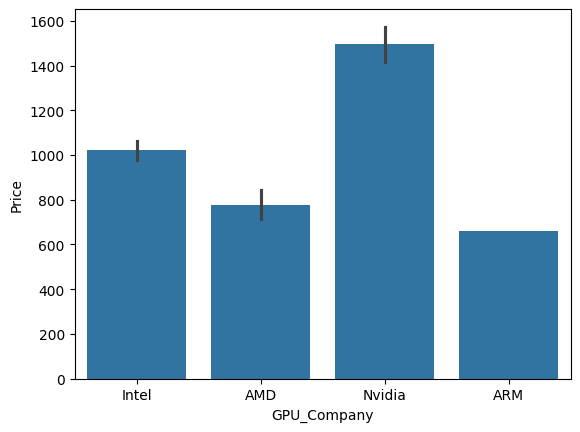

In [60]:
sns.barplot(x=df['GPU_Company'], y=df['Price'])
plt.show()

In [61]:
df.drop(columns=['GPU_Type', 'CPU_Frequency'], inplace=True, axis=1)

In [62]:
df.head(3)

,Company,Product,TypeName,CPU_Company,CPU_Type,RAM,GPU_Company,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,8,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,8,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,250 G6,Notebook,Intel,Core i5 7200U,8,Intel,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,256


In [63]:
df['OpSys'].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [64]:
def cat_os(inp):
    if inp== 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux/No OS'

In [65]:
df['OS']=df['OpSys'].apply(cat_os)

In [66]:
df.head()

,Company,Product,TypeName,CPU_Company,CPU_Type,RAM,GPU_Company,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD,OS
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,8,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Mac
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,8,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Mac
2,HP,250 G6,Notebook,Intel,Core i5 7200U,8,Intel,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Other/Linux/No OS
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,16,AMD,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,Mac
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,8,Intel,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Mac


In [67]:
df.head()

,Company,Product,TypeName,CPU_Company,CPU_Type,RAM,GPU_Company,OpSys,Weight,Price,Touch_Screen,IPS,ppi,Cpu_Name,Cpu_brand,HDD,SSD,OS
0,Apple,MacBook Pro,Ultrabook,Intel,Core i5,8,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Mac
1,Apple,Macbook Air,Ultrabook,Intel,Core i5,8,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Mac
2,HP,250 G6,Notebook,Intel,Core i5 7200U,8,Intel,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Other/Linux/No OS
3,Apple,MacBook Pro,Ultrabook,Intel,Core i7,16,AMD,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,Mac
4,Apple,MacBook Pro,Ultrabook,Intel,Core i5,8,Intel,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Mac


<Axes: xlabel='OS', ylabel='Price'>

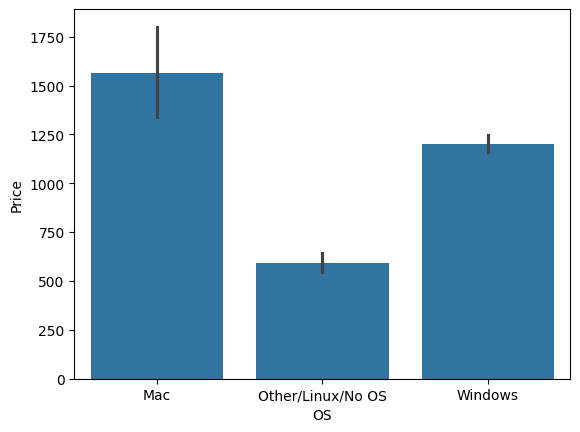

In [68]:
sns.barplot(x=df['OS'], y=df['Price'])

C:\Users\User\AppData\Local\Temp\ipykernel_7860\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

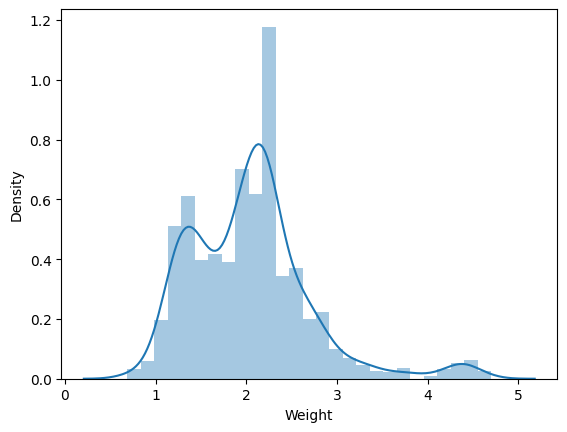

In [69]:
sns.distplot(df['Weight'])

In [70]:
df_numeric=df.select_dtypes(include=[int,float])
correl=df_numeric.corr()

In [71]:
correl

,RAM,Weight,Price,Touch_Screen,IPS,ppi,HDD,SSD
RAM,1.000000,0.389370,0.740287,0.111622,0.201781,0.293482,0.097689,0.600091
Weight,0.389370,1.000000,0.211883,-0.293984,0.022129,-0.320933,0.511241,-0.056043
Price,0.740287,0.211883,1.000000,0.188886,0.250737,0.470032,-0.098108,0.670237
Touch_Screen,0.111622,-0.293984,0.188886,1.000000,0.139723,0.454303,-0.206133,0.249798
IPS,0.201781,0.022129,0.250737,0.139723,1.000000,0.290986,-0.091369,0.214011
ppi,0.293482,-0.320933,0.470032,0.454303,0.290986,1.000000,-0.291509,0.497717
HDD,0.097689,0.511241,-0.098108,-0.206133,-0.091369,-0.291509,1.000000,-0.399713
SSD,0.600091,-0.056043,0.670237,0.249798,0.214011,0.497717,-0.399713,1.000000


<Axes: >

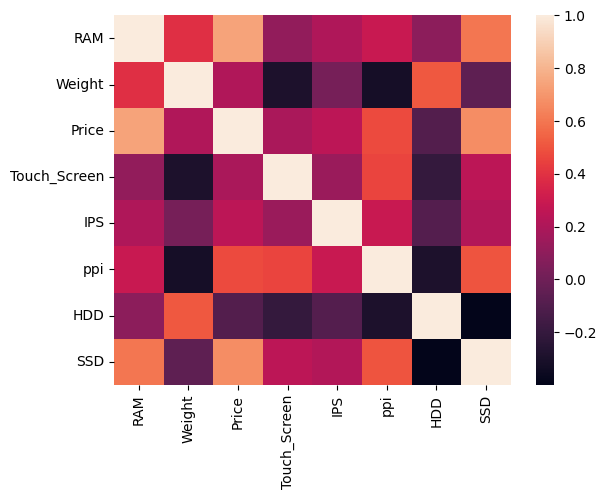

In [72]:
sns.heatmap(correl)

In [73]:
df.columns

Index(['Company', 'Product', 'TypeName', 'CPU_Company', 'CPU_Type', 'RAM',
       'GPU_Company', 'OpSys', 'Weight', 'Price', 'Touch_Screen', 'IPS', 'ppi',
       'Cpu_Name', 'Cpu_brand', 'HDD', 'SSD', 'OS'],
      dtype='object')

In [74]:
df.drop(columns=['Product','CPU_Company','CPU_Type','Cpu_Name'],inplace=True, axis=1)

In [75]:
df.drop(columns=['OpSys'], inplace=True, axis=1)

In [76]:
X=df.drop(columns=['Price'], axis=1)

In [95]:
y = np.log(df['Price'])



In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

## Linear Regresssion

In [91]:
categorical_features = ['Company', 'TypeName', 'GPU_Company', 'Cpu_brand', 'OS']

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate and print metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7700665954051027
MAE: 249.66543862790934


In [100]:
categorical_features = ['Company', 'TypeName', 'GPU_Company', 'Cpu_brand', 'OS']

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

step2 = DecisionTreeRegressor(max_depth=7,min_samples_leaf=10)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Training data', pipe.score(X_train,y_train))
print('Testing data', pipe.score(X_test,y_test))


R2 score: 0.7865571094637224
MAE: 0.21239072289617858
Training data 0.8587140320479407
Testing data 0.7865571094637224


In [101]:
categorical_features = ['Company', 'TypeName', 'GPU_Company', 'Cpu_brand', 'OS']

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

step2 = SVR(kernel='rbf',C=200,epsilon=0.1)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate and print metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Training data', pipe.score(X_train,y_train))
print('Testing data', pipe.score(X_test,y_test))

R2 score: 0.7396403252787794
MAE: 0.23183192188558807
Training data 0.7528895873359532
Testing data 0.7396403252787794


In [145]:
categorical_features = ['Company', 'TypeName', 'GPU_Company', 'Cpu_brand', 'OS']

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=8,
                              max_samples=0.6,
                              max_features=0.5,
                              max_depth=5)
# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate and print metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Training data', pipe.score(X_train,y_train))
print('Testing data', pipe.score(X_test,y_test))




R2 score: 0.8185580018143241
MAE: 0.2022794141743897
Training data 0.8629852454366863
Testing data 0.8185580018143241


## Conclude that Randrom Forest give the best accuracy on train and test both

In [124]:
import pickle
pickle.dump(df,open('dfss.pkl','wb'))
pickle.dump(pipe, open('pipess.pkl','wb'))


In [ ]:
df